# Welch' T-test

Just as Student's t-test is a useful adaptation of the normal distribution which can lead to better likelihood estimates under certain conditions, the Welch's t-test is a further adaptation that accounts for additional perturbations in the underlying assumptions of the model. Specifically, the Student's t-test assumes that the samples are of equal size and equal variance. When these assumptions are not met, then Welch's t-test provides a more accurate p-value.

Here is how you calculate it: 


 $ \Large t = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{{s_1}^2}{N_1} + \frac{{s_2}^2}{N_2}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{{se_1}^2+{se_2}^2}}$
where  

* $\bar{X_i}$ - mean of sample i
* ${s_i}^2$ - variance of sample i
* $N_i$ - sample size of sample i 

The modification is related to the **degrees of freedom** in the t-test, which tends to increase the test power for samples with unequal variance. When two groups have equal sample sizes and variances, Welch’s t-test tends to give the same result as the Student’s t-test. However, when sample sizes and variances are unequal, Student’s t-test is quite unreliable, whereas Welch’s tends perform better.

## Calculate the degrees of freedom

Once the t-score has been calculated for the experiment using the above formula, you then must calculate the degrees of freedom for the t-distribution. Under the two-sample Student's t-test, this is simply the total number of observations in the samples size minus two, but given that the sample sizes may vary using the Welch's t-test, the calculation is a bit more complex:  

$ \Large v \approx \frac{\left( \frac{{s_1}^2}{N_1} + \frac{{s_2}^2}{N_2}\right)^2}{\frac{{s_1}^4}{{N_1}^2v_1} + \frac{{s_2}^4}{{N_2}^2v_2}} $

## Calculate p-values  

Finally, as with the Student's t-test (or a z-test for that matter), you convert the calculated score into a p-value in order to confirm or reject the null-hypothesis of your statistical experiment. For example, you might be using a one-sided t-test to determine whether a new drug had a positive effect on patient outcomes. The p-value for the experiment is equivalent to the area under the t-distribution with the degrees of freedom, as calculated above, and the corresponding t-score.

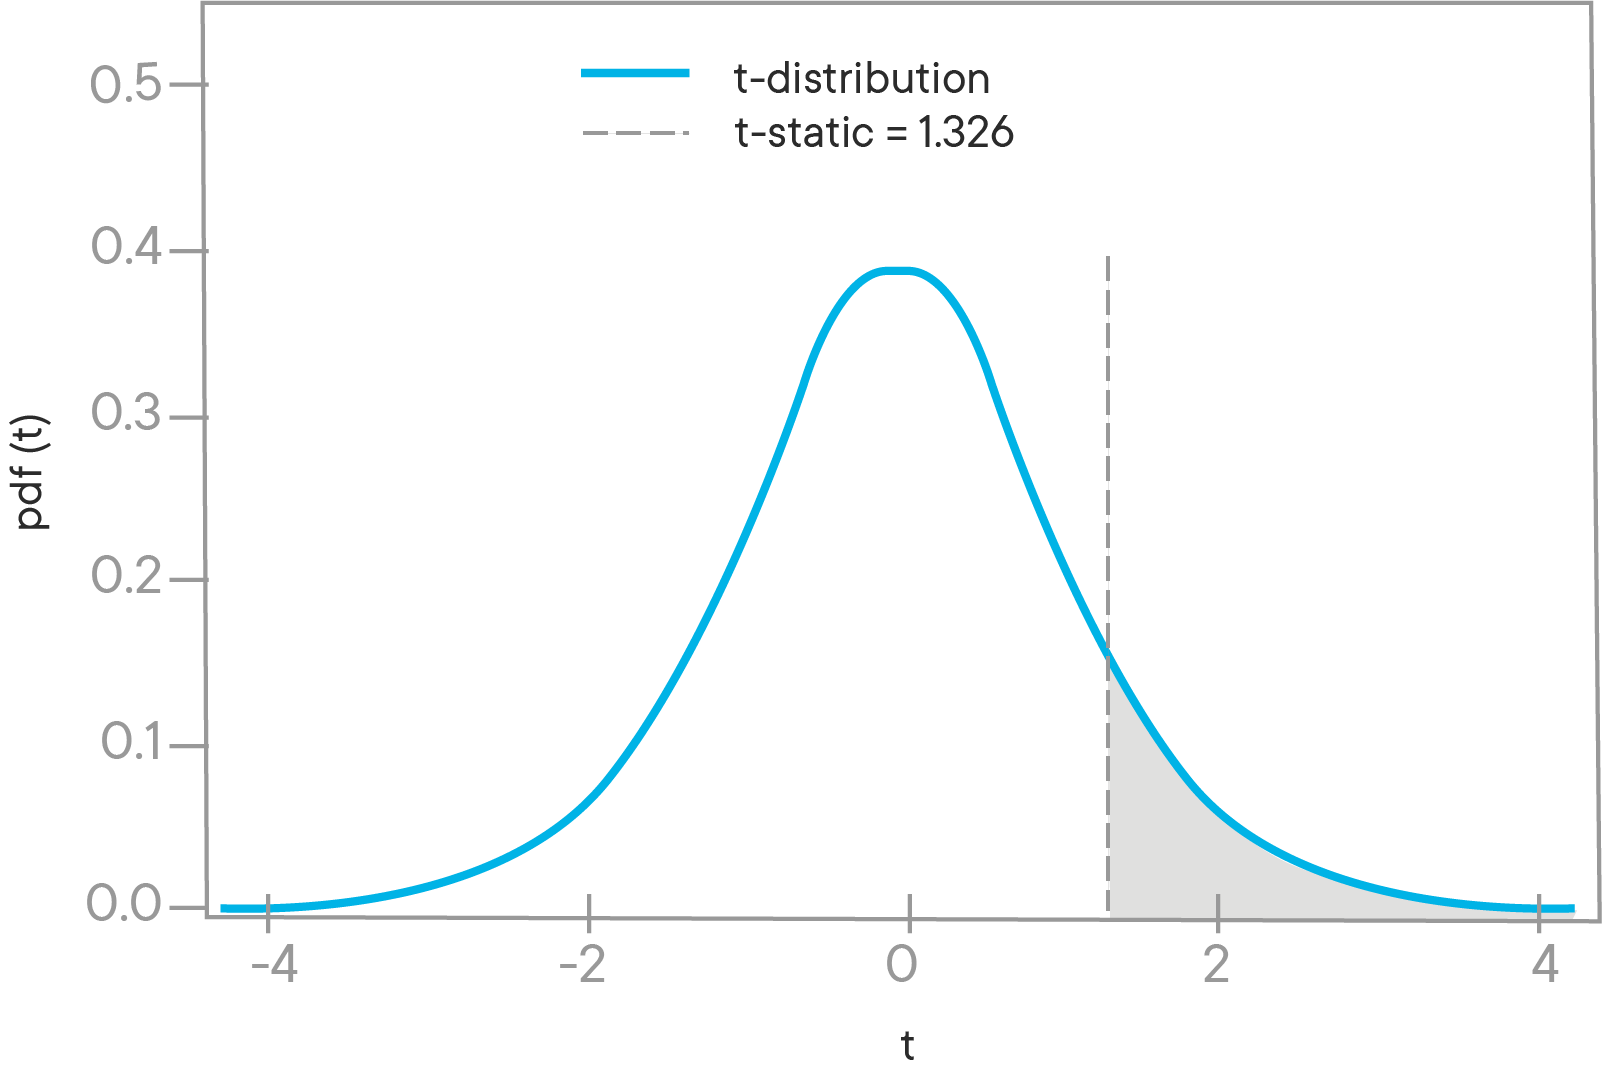

The easiest method for determining said p-values is to use the `.cdf()` method from `scipy.stats` to find the complement and subtracting this from 1.

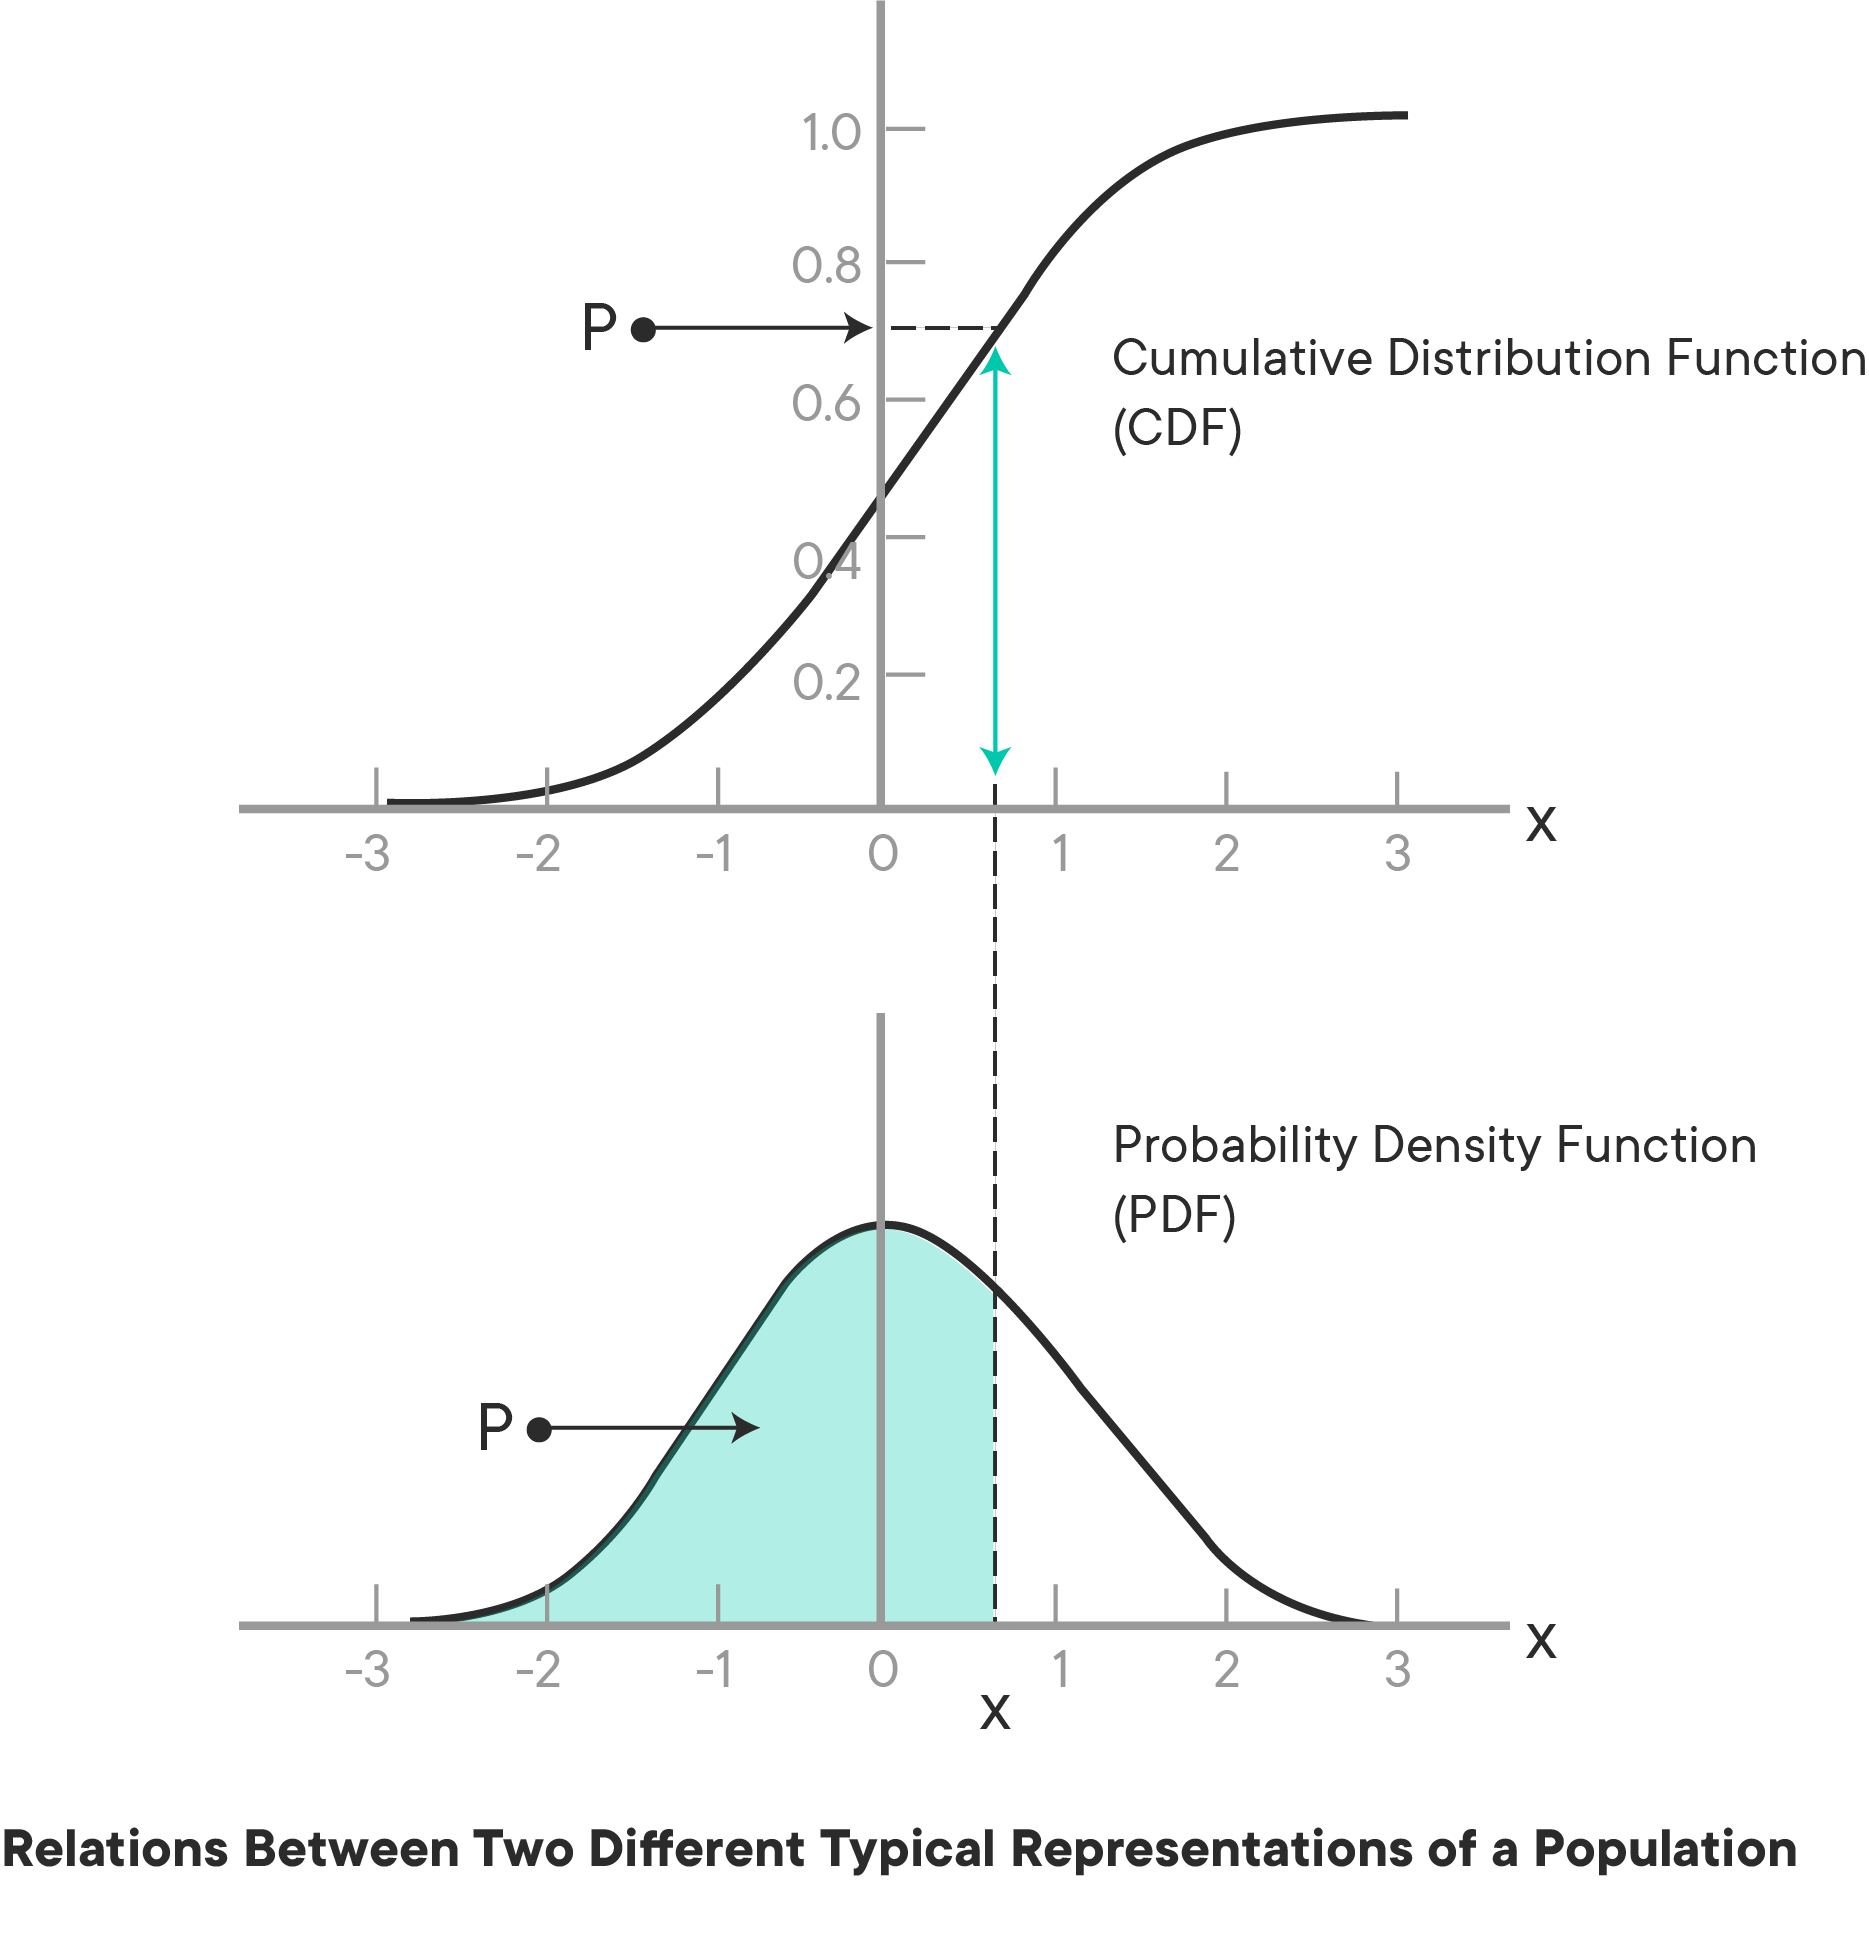

Here's the relevant code snippet:

```python
import scipy.stats as stats


p = 1 - stats.t.cdf(t, df)
```

# Welch's T-test - Lab

## Introduction 

Now that you've gotten a brief introduction to Welch's t-test, it's time to practice your NumPy and math programming skills to write your own Welch's T-test function! 

## Objectives

In this lab you will: 

- Write a function to calculate Welch's t-score 
- Calculate the degrees of freedom for a Welch's t-test   
- Calculate p-values using Welch's t-test


### Welch's t-test

Recall that Welch's t-Test is given by  

# $ t = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{{s_1}^2}{N_1} + \frac{{s_2}^2}{N_2}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{{se_1}^2+{se_2}^2}}$

where $\bar{X_i}$ , ${s_i}^2$, and $N_i$ are the sample mean, sample variance, and sample size, respectively, for sample i.

Write a function for calculating Welch's t-statistic using two samples a and b. To help, 2 potential samples are defined below.

> **Important Note**: While the formula does not indicate it, it is appropriate to take the absolute value of the t-value.

In [1]:
import numpy as np

np.random.seed(82)
control = np.random.normal(loc=10, scale=1, size=8)
treatment = np.random.normal(loc=10.5, scale=1.2, size=12)

In [2]:
control

array([10.8406504 ,  8.64285284, 11.28693651, 10.57347539, 10.57945015,
        9.97237817,  9.61844717,  9.69121804])

In [3]:
treatment

array([12.16530726, 12.5597993 , 11.76525366,  9.82399228, 11.03539891,
       12.8992533 , 10.78680718, 11.71126641, 10.2343344 ,  9.77839837,
        9.72938618, 10.39959928])

In [4]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """
    numerator = a.mean() - b.mean()
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    denominator = np.sqrt(a.var(ddof = 1)/a.size + b.var(ddof = 1)/b.size)
    return np.abs(numerator/denominator)# Return the t-score!

welch_t(control, treatment)
# 2.0997990691576858

2.0997990691576858

## Degrees of freedom

Once you have the t-score, you also need to calculate the degrees of freedom to determine the appropriate t-distribution and convert this score into a p-value. The effective degrees of freedom can be calculated using the formula:

# $ v \approx \frac{\left( \frac{{s_1}^2}{N_1} + \frac{{s_2}^2}{N_2}\right)^2}{\frac{{s_1}^4}{{{N_1}^2}v_1} + \frac{{s_2}^4}{{{N_2}^2}v_2}} $

$N_i$ - sample size of sample i  
${s_i}^2$ - variance of sample i  
$v_i$ - degrees of freedom for sample i (equivalent to $N_i-1$)  
  
Write a second function to calculate degree of freedom for above samples:

In [6]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

welch_df(control, treatment)
# 17.673079085111

17.673079085111

Now calculate the welch t-score and degrees of freedom from the samples, a and b, using your functions.

In [7]:
# Your code here; calculate t-score and the degrees of freedom for the two samples, a and b
t = welch_t(control, treatment)
df = welch_df(control, treatment)
print(t, df)
# 2.0997990691576858 17.673079085111

2.0997990691576858 17.673079085111


## Convert to a p-value

Great! Now that you have the t-score and the degrees of freedom, it's time to convert those values into a p-value (for a one-sided t-test). Remember that the easiest way to do this is to use the cumulative distribution function associated with your particular t-distribution.  

Calculate the p-value associated with this experiment.

In [9]:
import scipy.stats as stats

In [10]:
# Your code here; calculate the p-value for the two samples defined above

p = 1 - stats.t.cdf(t, df)
print(p)
# 0.025191666225846454

0.025191666225846454


In this case, there is a 2.5% probability you would see a t-score equal to or greater than what you saw from the data. Given that alpha was set at 0.05, this would constitute sufficient evidence to reject the null hypothesis.

Building on this, you can also write a function that calculates the p-value for given samples with a two-sided test by taking advantage of the symmetry of the t-distribution to calculate only one side. The two-tailed p-value is simply twice the one-tailed value because you want the probability:  
> $t<−|t̂|$ and  $t>|t̂|$ , where t̂  is the t-statistic calculated from our data  

With that, define a summative function `p_val_welch(a, b, two_sided=False)` which takes in two samples a and b, as  well as an optional binary variable to allow you to toggle between a one and two-sided Welch's t-test.   

> The default behavior should be set to one-sided as indicated above. If the parameter two_sided is set to True, the function should return the p-value for a two-sided t-test, as opposed to a one-sided t-test.

In [14]:
def p_value(a, b, two_sided=False):

    t = welch_t(a, b)
    df = welch_df(a, b)
    
    p = 1-stats.t.cdf(np.abs(t), df)
    
    if two_sided:
        return 2*p
    else:
        return p

Now briefly test your function; no need to write any code just run the cells below to ensure your function is operating properly. The output should match the commented values.

In [15]:
p_value(treatment, control)
# 0.025191666225846454

0.025191666225846454

In [17]:
p_value(treatment, control, two_sided=True)
# 0.05038333245169291

0.05038333245169291

## Summary

Nice work! In this lab, you practiced implementing functions for Welch's t-test when sample variances or sample sizes differ in your experimental groups. You also got to review converting t-scores into p-values. All of this should continue to build on your abilities to effectively design and carry out statistically valid hypothesis tests.

# Effect Size, P-Values and Power - Lab

## Introduction 

In this lab, you'll run simulations to continue to investigate the relationship between effect size, p-values, power, and sample size!

## Objectives

You will be able to:

* Run a simulation that creates a visualization to demonstrate the interaction between power, sample size, and effect size

## Philosophical review

Remember that the underlying question behind all hypothesis tests is:

>"What is the probability I would see this effect due to random fluctuations if there was actually no effect?" 

This is exactly what a p-value represents: the chance that the observed data would satisfy the null hypothesis. As such, if the p-value is sufficiently low, you can declare the results statistically significant and reject the null hypothesis. Recall that this threshold is defined as $\alpha$, and is also the rate of type I errors. In this lab, you'll investigate the robustness of p-values and their relation with effect-size and sample-size. 

## Import starter functions

To start, import the functions stored in the `flatiron_stats.py` file. It contains the stats functions that you previously coded in the last lab: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. You'll then use these functions below to further investigate the relationship between p-values and sample size.

In [21]:
# Your code here; import the contents from flatiron_stats.py
# You may also wish to open up flatiron_stats.py in a text editor to preview its contents
from flatiron_stats import * 

## Generate random samples

Before you start running simulations, it will be useful to have a helper function that will generate random samples. Write such a function below which generates 2 random samples from 2 normal distributions. The function should take 6 input parameters:

* m1 - The underlying population mean for sample 1
* s1 - The underlying population standard deviation for sample 1
* n1 - The sample size for sample 1

* m2 - The underlying population mean for sample 2
* s2 - The underlying population standard deviation for sample 2
* n2 - The sample size for sample 2

In [22]:
import numpy as np
def generate_samples(m1, s1, n1, m2, s2, n2):
    # Your code here; have the function create two random samples using the input parameters
    sample1 = np.random.normal(loc = m1, scale = s1, size = n1)
    sample2 = np.random.normal(loc = m2, scale = s2, size = n2)
    return sample1, sample2

## Run a simulation

For your first simulation, you're going to investigate how the p-value of an experiment relates to sample size when both samples are from identical underlying distributions. To do this, use your `generate_samples()` function along with the `p_value_welch_ttest()` function defined in the `flatiron_stats` file. Use sample sizes from 5 to 750. For each sample size, simulate 100 experiments. For each of these experiments, generate 2 samples of the given sample size. Each sample should have a standard deviation of 1. The first sample should have a mean of 5 and the second should have a mean of 5 plus the effect size, you hope to detect. Calculate the corresponding p-values for a Welch's t-test for each of these sample pairs. Finally, use the p-values to calculate the power of the test. Remember that for all of the simulations where the effect size does not equal zero, the null hypothesis is not true. Store the overall power from the 100 simulations along with the corresponding sample size and effect size. Use varying effect sizes such as [0, 0.01, 0.1, 0.2, 0.5, 1, 2]. You'll then plot power vs sample size for various effect sizes.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [24]:
# Your code here
p_vs_e_n = {}
alpha = 0.05
for effect_size in [0, 0.01,.1,.2, .5, 1, 2]:
    n_vs_p = {}
    for n in range(5,750,5):
        p_vals = []
        for i in range(100):
            sample1, sample2 = generate_samples(m1=5, s1=1, n1=n, m2=5+effect_size, s2=1, n2=n)
            p = p_value_welch_ttest(sample1, sample2)
            p_vals.append(p)
        n_vs_p[n] = np.sum([1 for p in p_vals if p<alpha])/len(p_vals)
    p_vs_e_n[effect_size] = n_vs_p
# Pseudo code outline
# for effect size:
#     for sample_size:
#         perform 100 simulations
#         calculate power
#         store effect_size, sample_size, power for simulations

Now that you've simulated the data, go ahead and graph it! Label the x-axis sample size, the y-axis power, and be sure to include a legend for the various effect sizes.

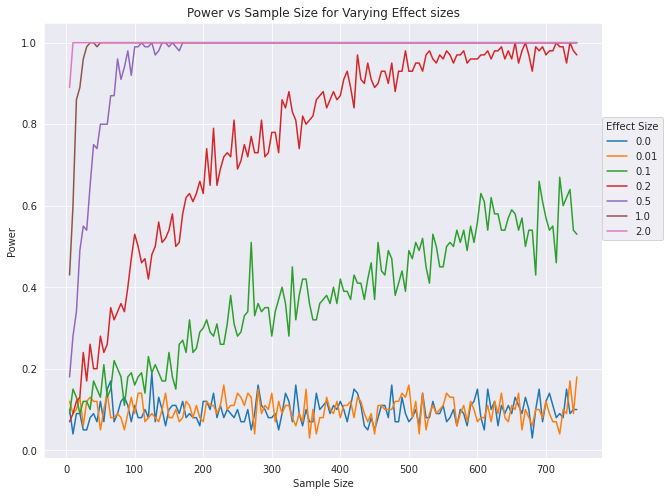

In [25]:
# Your code here
df = pd.DataFrame.from_dict(p_vs_e_n)
df.plot(figsize=(10, 8))
plt.title('Power vs Sample Size for Varying Effect sizes')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.legend(title='Effect Size', loc=(1, 0.5))

As you can see, it's also typically incredibly difficult (if not impossible) to accurately detect effect sizes below 0.1!